u' = 998u + 1998v
v' = -999u - 1999v
Я:
НЯ:решить и показать что при некотором шаге явный уходит в беск а неявный нормально сходится
проверить порядок

In [208]:
import scipy.linalg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *

In [209]:
A = np.array([[998,1998], [-999, -1999]])

In [210]:
vals, vectors = scipy.linalg.eig(A)

In [211]:
print(vals)

[   -1.+0.j -1000.+0.j]


In [212]:
vals[1]/vals[0]

(1000-0j)

In [213]:
def u(x,a,b):
    return 2*a*exp(-x) + b*exp(-1000*x)

In [214]:
def v(x,a,b):
    return (-a)*exp(-x) + (-b)*exp(-1000*x)

In [330]:
def get_constants_a_b(u_x, v_x, x):
    a = (u_x + v_x)/exp(-x)
    b = - (u_x + 2*v_x)/exp(-1000*x)
    return a,b

In [332]:
u_x = 1
v_x = 1
x = 0
x_final = 0.5
a, b = get_constants_a_b(u_x, v_x, x)

In [215]:
#видим что система является жесткой

In [337]:
def solution(h, x, u_begin, v_begin, n, a, b, f1, f2):
    #найдем первые значения явной простейшей сеткой
    u = []
    v = []
    ub = u_begin
    vb = v_begin
    u.append(u_begin)
    v.append(v_begin)
    u_1 = f1(x + h, a, b)
    u.append(u_1)
    v_1 = f2(x + h, a, b)
    v.append(v_1)
    u_2 = f1(x + 2*h, a, b)
    u.append(u_2)
    v_2 = f2(x + 2*h, a, b)
    v.append(v_2)
    for i in range(3, n + 1):
        res = u[i - 1] + (h/12)*(23*(998*u[i - 1] + 1998*v[i - 1]) - 16*(998*u[i - 2] + 1998*v[i - 2]) + 5*(998*u[i - 3] + 1998*v[i - 3]))
        u.append(res)
        v.append(v[i - 1] + (h/12)*(23*((-999)*u[i - 1] - 1999*v[i - 1]) - 16*((-999)*u[i - 2] - 1999*v[i - 2]) + 5*((-999)*u[i - 3] - 1999*v[i - 3])))
    return u, v

In [338]:
res_u, res_v = solution(h, x, u_x, v_x, n, a, b, u, v)

In [345]:
def plotting_results(res_u, res_v, lst_u, lst_v):
    plt.subplot(221)
    plt.plot(np.linspace(x, x_final, 5000), [2*a*exp(-i) + b*exp(-1000*i) for i in np.linspace(x, x_final, 5000)])
    plt.plot(np.linspace(x, x_final, len(res_u)), res_u)
    plt.subplot(222)
    plt.plot(np.linspace(x, x_final, 5000), [(-a)*exp(-i) + (-b)*exp(-1000*i) for i in np.linspace(x, x_final, 5000)])
    plt.plot(np.linspace(x, x_final, len(res_v)), res_v)
    plt.subplot(223)
    plt.plot(np.linspace(x, x_final, 5000), [2*a*exp(-i) + b*exp(-1000*i) for i in np.linspace(x, x_final, 5000)])
    plt.plot(np.linspace(x, x_final, len(lst_u)), lst_u)
    plt.subplot(224)
    plt.plot(np.linspace(x, x_final, 5000), [(-a)*exp(-i) + (-b)*exp(-1000*i) for i in np.linspace(x, x_final, 5000)])
    plt.plot(np.linspace(x, x_final, len(lst_v)), lst_v)

In [346]:
def another_solution(h, x, u_begin, v_begin, n, a,b,f1,f2):
    u = []
    v = []
    u.append(u_begin)
    v.append(v_begin)
    u_1 = f1(x + h, a, b)
    u.append(u_1)
    v_1 = f2(x + h, a, b)
    v.append(v_1)
    C = h/12
    K1 = 998*5
    K2 = 1998*5
    K3 = (-999)*5
    K4 = (-1999)*5
    for i in range(2, n + 1):
        D1 = 8*(998*u[i-1] + 1998*v[i-1]) - 998*u[i-2] - 1998*v[i-2]
        D2 = 8*(-999*u[i-1] - 1999*v[i - 1]) + 999*u[i - 2] + 1999*v[i - 2]
        M = 1 - C*K3*C*K2/(1 - C*K1) - C*K4
        res_v = v[i - 1]/M + C*K3*u[i-1]/((1 - C*K1)*M) + C*K3*C*D1/((1 - C*K1)*M) + C*D2/M
        v.append(res_v)
        res_u = u[i - 1]/(1-C*K1) + C*K2*res_v/(1-C*K1) + C*D1/(1-C*K1)
        u.append(res_u)
    return u, v

In [347]:
lst_u, lst_v = another_solution(h, x, u_x, v_x, n,a,b,u,v)

In [349]:
def get_difference(res, f, a, b, u_x, v_x, h, x, x_final):
    k = [x+ i*h for i in range(len(res))]
    return np.max([abs(res[i] - f(k[i],a,b)) for i in range(len(k))]), np.array([abs(res[i] - f(k[i],a,b)) for i in range(len(k))])

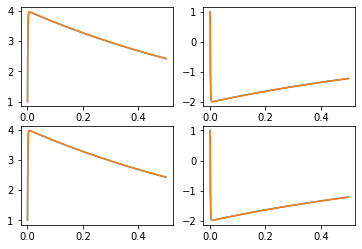

In [350]:
plotting_results(res_u, res_v, lst_u, lst_v)

In [372]:
def all_solution(u_x, v_x, h, x, x_final, n):
    a, b = get_constants_a_b(u_x, v_x, x)
    res_u, res_v = solution(h, x, u_x, v_x, n, a, b, u, v)
    lst_u, lst_v = another_solution(h, x, u_x, v_x, n, a, b, u, v)
    plotting_results(res_u, res_v, lst_u, lst_v)
    t = []
    r = []
    maks, mas = get_difference(res_u, u, a, b, u_x, v_x, h, x, x_final)
    t.append(maks)
    r.append(mas)
    maks, mas = get_difference(res_v, v, a, b, u_x, v_x, h, x, x_final)
    t.append(maks)
    r.append(mas)
    maks, mas = get_difference(lst_u, u, a, b, u_x, v_x, h, x, x_final)
    t.append(maks)
    r.append(mas)
    maks, mas = get_difference(lst_v, v, a, b, u_x, v_x, h, x, x_final)
    t.append(maks)
    r.append(mas)
    return t, r

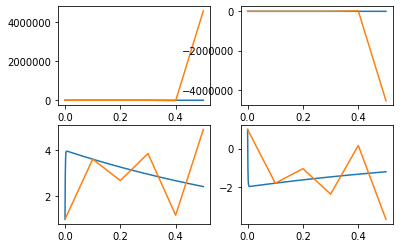

In [373]:
t, r = all_solution(1, 1, 0.1, 0, 0.5, int((x_final - x)/0.1))

In [374]:
print(r)

[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.24999870e+02,
       2.38333336e+04, 4.56088889e+06]), array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.24999935e+02,
       2.38333334e+04, 4.56088889e+06]), array([0.        , 0.        , 0.58592321, 0.90182017, 1.50232403,
       2.48839804]), array([0.        , 0.        , 0.58593035, 0.9018073 , 1.50234147,
       2.48837701])]


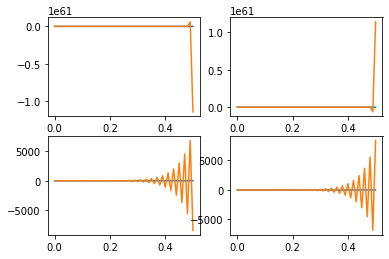

In [375]:
t, r = all_solution(1,1,0.01,0,0.5, int((x_final - x)/0.01))

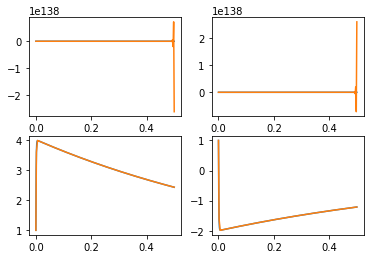

In [376]:
t, r = all_solution(1,1,0.002,0,0.5, int((x_final - x)/0.002))

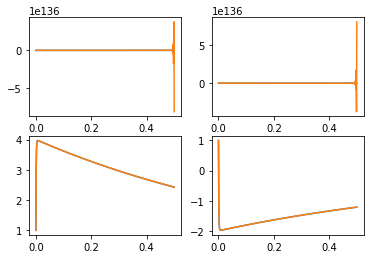

In [377]:
t,r = all_solution(1,1,0.0012,0,0.5, int((x_final - x)/0.0012))

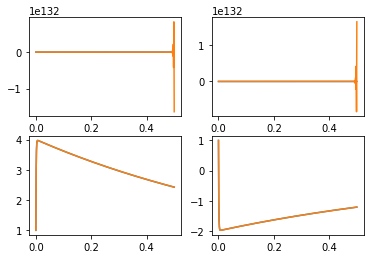

In [378]:
t, r = all_solution(1,1,0.0011,0,0.5, int((x_final - x)/0.0011))

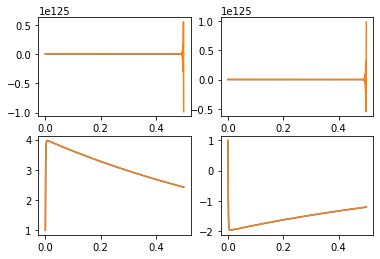

In [379]:
t, r = all_solution(1,1,0.0010,0,0.5, int((x_final - x)/0.001))

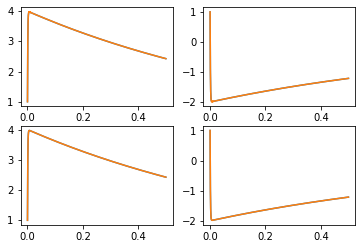

In [380]:
r1, mist1 = all_solution(1,1,0.0005,0,0.5, int((x_final - x)/0.0005))

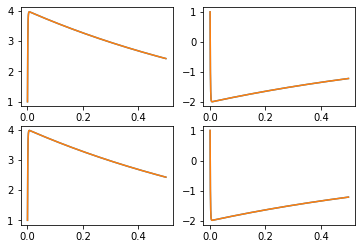

In [381]:
r2, mist2 = all_solution(1,1,0.00005,0,0.5, int((x_final - x)/0.00005))

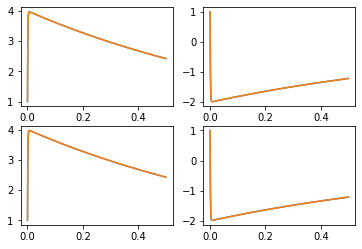

In [382]:
r3, mist3 = all_solution(1,1,0.000025,0,0.5, int((x_final - x)/0.000025))

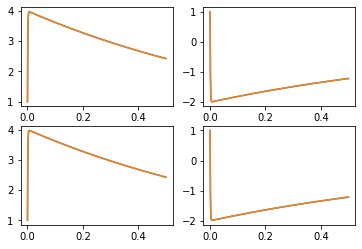

In [383]:
r4, mist4 = all_solution(1,1,0.0000125,0,0.5, int((x_final - x)/0.0000125))

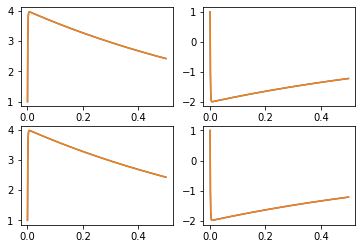

In [384]:
r5, mist5 = all_solution(1,1,0.00000625,0,0.5, int((x_final - x)/0.00000625))

In [385]:
r2

[4.940040856338257e-05,
 4.940040856327155e-05,
 5.570346023553441e-06,
 5.570346021666062e-06]

In [386]:
r3

[6.318643373415256e-06,
 6.3186433736373004e-06,
 7.072718530842792e-07,
 7.072718583023274e-07]

In [387]:
r4

[7.990084736064773e-07,
 7.990084727182989e-07,
 8.910747428814147e-08,
 8.910747928414509e-08]

In [388]:
r5

[1.0045632325983433e-07,
 1.0045632248267822e-07,
 1.1182477610560682e-08,
 1.1182484938032644e-08]

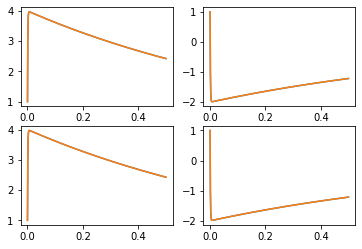

In [400]:
r6, mist6 = all_solution(1,1,0.000003125,0,0.5, int((x_final - x)/0.000003125))

In [389]:
for i in range(4):
    print(r2[i]/r3[i])

7.818198566361156
7.818198566068844
7.875820307654281
7.8758202468802105


In [390]:
for i in range(4):
    print(r3[i]/r4[i])

7.908105586033215
7.908105595101771
7.937289870849855
7.937289484387563


In [391]:
for i in range(4):
    print(r4[i]/r5[i])

7.953789743427198
7.953789796118335
7.968491186960998
7.968486412271612


In [401]:
for i in range(4):
    print(r5[i]/r6[i])

7.97682952739211
7.9768283405233475
7.98389979501797
7.984095519783338


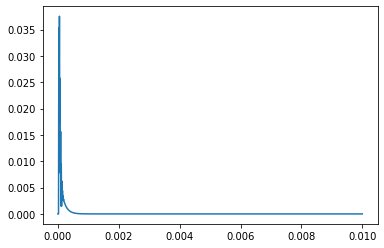

In [395]:
plt.plot([x+ i*h for i in range(len(mist1[0]))],mist1[0])

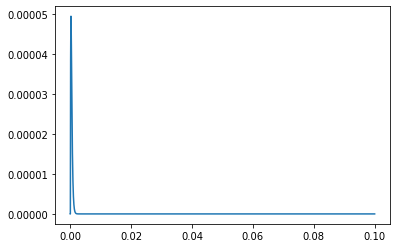

In [398]:
plt.plot([x+ i*h for i in range(len(mist2[0]))],mist2[0])

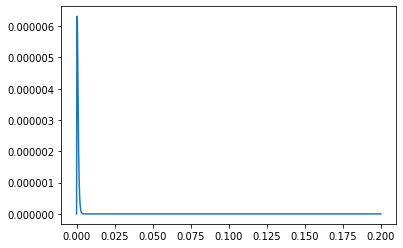

In [399]:
plt.plot([x+ i*h for i in range(len(mist3[0]))],mist3[0])

In [207]:
mist4[0][:5]

array([0.00000000e+00, 9.24627175e-07, 1.82625123e-06, 2.67832099e-06,
       3.50921934e-06])